In [345]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold, cross_val_predict
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [346]:
gender = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [347]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [348]:
train.shape

(891, 12)

In [349]:
train.drop('Name', axis=1, inplace=True)

In [350]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [351]:
train.memory_usage(deep=True)

Index            128
PassengerId     7128
Survived        7128
Pclass          7128
Sex            54979
Age             7128
SibSp           7128
Parch           7128
Ticket         56802
Fare            7128
Cabin          34344
Embarked       58738
dtype: int64

In [352]:
new_data_types = {'PassengerId':np.int16, 'Survived':'category', 
                    'Pclass':np.int8, 
                     'SibSp':np.int8, 'Parch':np.int8}


train = train.astype(new_data_types)

new_data_types = {'PassengerId':np.int16, 
                    'Pclass':np.int8, 
                     'SibSp':np.int8,
                   'Parch':np.int8}


test = test.astype(new_data_types)

In [353]:
train.memory_usage(deep=True)

Index            128
PassengerId     1782
Survived         987
Pclass           891
Sex            54979
Age             7128
SibSp            891
Parch            891
Ticket         56802
Fare            7128
Cabin          34344
Embarked       58738
dtype: int64

In [354]:
train.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [355]:
train.describe(include=[np.object, pd.Categorical]).T

,count,unique,top,freq
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,B96 B98,4
Embarked,889,3,S,644


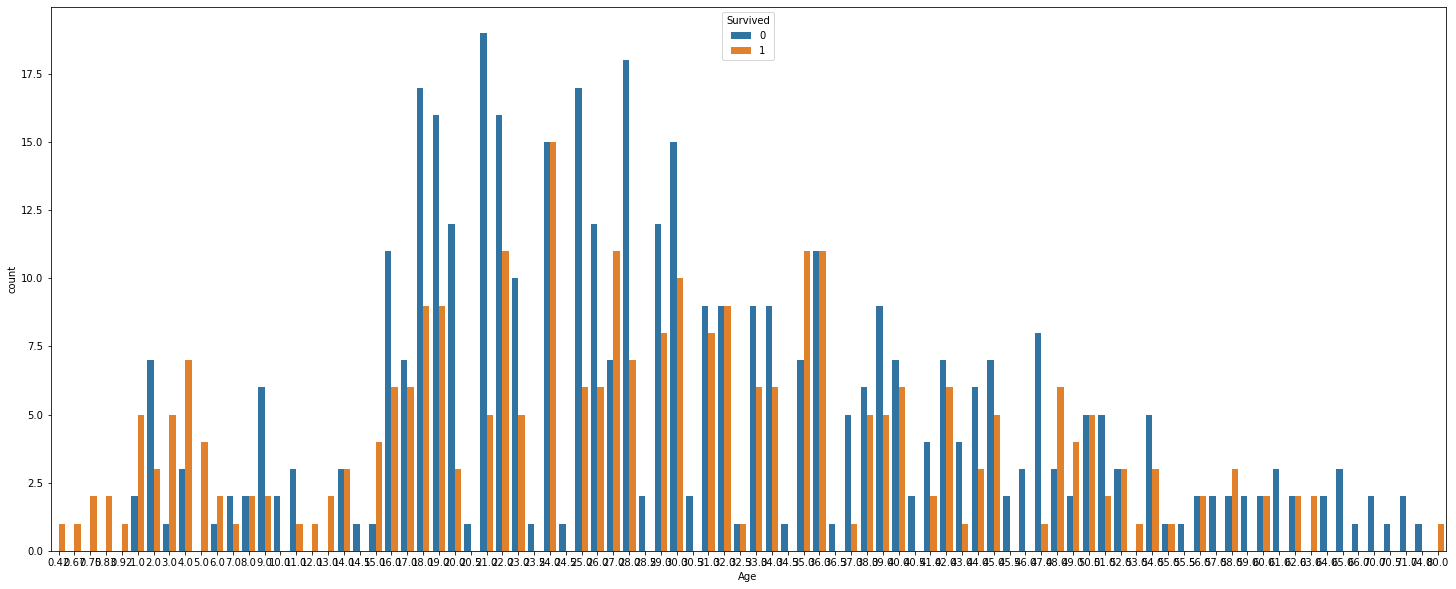

In [356]:
ax = sns.countplot(x=train['Age'], data=train, hue='Survived')
ax.figure.set_size_inches(25, 10)
plt.show()

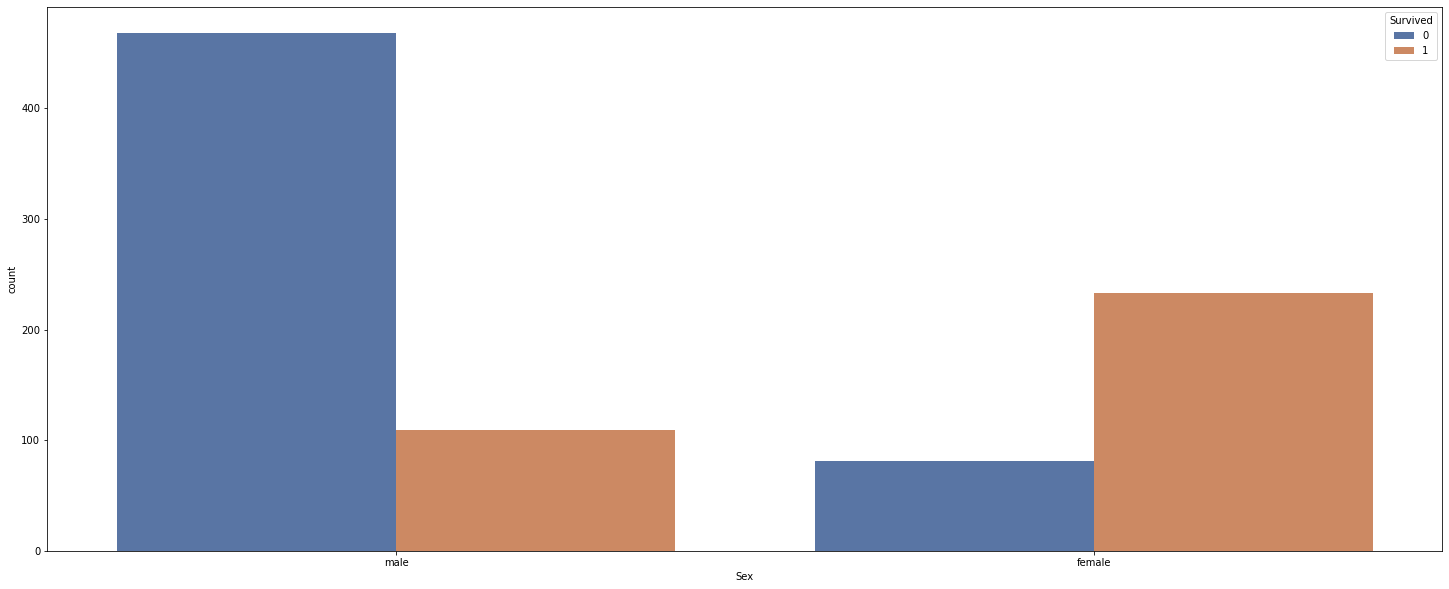

In [357]:
ax = sns.countplot(x=train['Sex'], 
                   data=train,
                   hue='Survived',
                   palette='deep')
ax.figure.set_size_inches(25, 10)
plt.show()

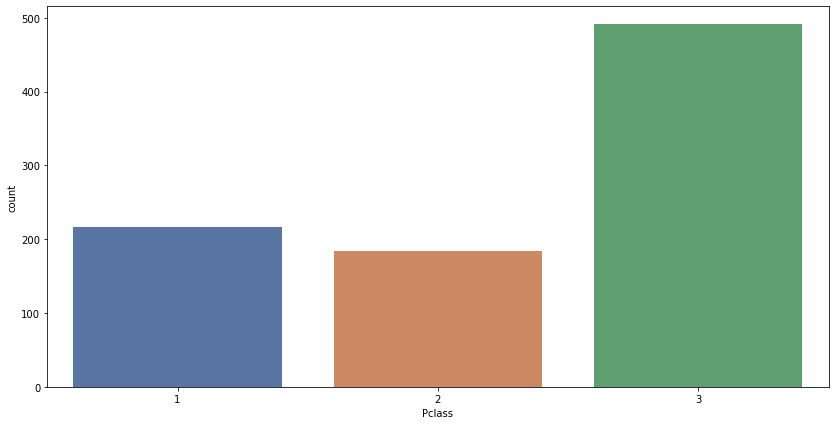

In [358]:
ax = sns.countplot(x=train['Pclass'],
                  palette='deep')
ax.figure.set_size_inches(14, 7)

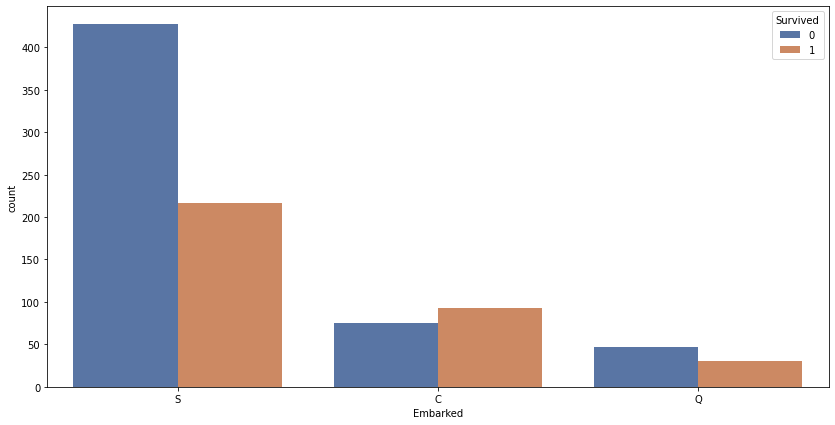

In [359]:
ax = sns.countplot(x='Embarked',
                  hue='Survived',
                  data=train,
                  palette='deep')
ax.figure.set_size_inches(14, 7)

In [360]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'Number of persons')

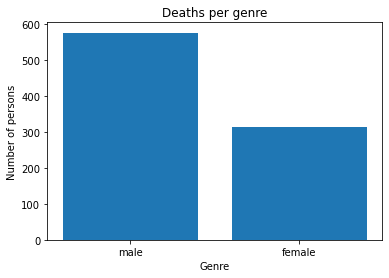

In [361]:
plt.bar(train.Sex.value_counts().index,
        train.Sex.value_counts().values)

plt.title('Deaths per genre')
plt.xlabel('Genre')
plt.ylabel('Number of persons')

In [362]:
train.groupby(['Sex']).sum()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,135343.0,678.0,7286.00,218.0,204.0,13966.6628
male,262043.0,1379.0,13919.17,248.0,136.0,14727.2865


In [363]:
train.loc[:, 'Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [364]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [365]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Parch']].copy()
y = train['Survived'].copy()

In [366]:
test2 = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Parch']].copy()

In [367]:
rest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

rest = ['Pclass', 'SibSp', 'Embarked']

fare_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'),['Age', 'SibSp', 'Parch', 'Pclass']),
    ('sex', OrdinalEncoder(), ['Sex']),
    ('rest', rest_pipeline, ['Embarked']),
    ('fare', fare_pipeline, ['Fare'])
])


X_prep = full_pipeline.fit_transform(X)
test_prep = full_pipeline.fit_transform(test2)

In [368]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.25, random_state=1)

In [369]:
X_train.shape

(668, 9)

In [370]:
#polynomial features of degree 2
poly = PolynomialFeatures(degree=2)


#transform the dataframe
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)


In [371]:
log_reg = LogisticRegression(max_iter=50000)

log_reg.fit(X_poly_train, y_train)

LogisticRegression(max_iter=50000)

In [372]:
log_reg_pred = log_reg.predict(X_poly_test)

score = log_reg.score(X_poly_train, y_train)
score

0.8562874251497006

In [373]:
confusion_matrix(y_test, log_reg_pred)

array([[118,  10],
       [ 39,  56]])

In [374]:
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Recall:", recall_score(y_test, log_reg_pred))
print('Precision:', precision_score(y_test, log_reg_pred))

Accuracy: 0.7802690582959642
Recall: 0.5894736842105263
Precision: 0.8484848484848485


Now we try to do the same for different degrees.

In [375]:
for i in range(1, 3):
    log_reg = LogisticRegression(max_iter=30000)
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    cv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=1, 
                                 random_state=1)
    x = cross_val_score(log_reg,
                    X_poly_train,
                    y_train, 
                    scoring='accuracy', 
                    cv=cv)
    print(i ,"\n",np.mean(x), np.std(x))

1 
 0.7964089327797105 0.014438798834840392
2 
 0.811424082594546 0.025292857029428052


In [376]:
log_reg_vot = LogisticRegression(max_iter=10000)

Seems like they perform almost the same so new models are needed

In [377]:
clf = LinearDiscriminantAnalysis()

param_grid = [
    {'solver':['svd', 'lsqr']},
    {'solver':['svd'],
    'tol':[.000001, .00001,.0001, .001, 0.1]}
]
grid_search = GridSearchCV(clf, 
                           param_grid, 
                           cv=10,
                           scoring='accuracy',
                          return_train_score=False)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid=[{'solver': ['svd', 'lsqr']},
                         {'solver': ['svd'],
                          'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.1]}],
             scoring='accuracy')

In [378]:
for i in range(1, 4):
    clf = LinearDiscriminantAnalysis()
    poly = PolynomialFeatures(degree=i)
    X_poly_train = poly.fit_transform(X_train)
    cv = RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=1, 
                                 random_state=1)
    grid_search = GridSearchCV(clf, 
                 param_grid, 
                 cv=cv,
                 scoring='accuracy',
                 return_train_score=True)
    x = grid_search.fit(X_poly_train, y_train)
    print(i , x.best_score_, x.best_estimator_)

1 0.7888901357872292 LinearDiscriminantAnalysis()
2 0.8263494557288744 LinearDiscriminantAnalysis(tol=0.1)
3 0.7994164515767028 LinearDiscriminantAnalysis(tol=0.1)


In [379]:
param_grid_lda = [
    {'solver':['svd', 'lsqr', 'eigen'],
     'tol':[.000001, .00001,.0001, .001, 0.1]}
]


lin_dis = LinearDiscriminantAnalysis()


grid_search_lda = GridSearchCV(lin_dis,
                               param_grid_lda, 
                               cv=5,
                               scoring='accuracy',
                               return_train_score=True)

grid_search_lda.fit(X_train, y_train)

/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 468, in fit
    self._solve_eigen(X, y, shrinkage=self.shrinkage)
  File "/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 335, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/opt/anaconda3/envs/data_science/lib/python3.8/site-packages/scipy/linalg/decomp.py", line 575, in eigh
    raise LinAlgError('The leading minor of order {} of B is not '
numpy.linalg.LinAlg

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(),
             param_grid=[{'solver': ['svd', 'lsqr', 'eigen'],
                          'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.1]}],
             return_train_score=True, scoring='accuracy')

In [380]:
linear = LinearDiscriminantAnalysis()

In [381]:
linear.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [382]:
y_pred_clf = linear.predict(X_train)

print("Accuracy:", accuracy_score(y_pred_clf, y_train))
print("Precision:", precision_score(y_pred_clf, y_train))
print("Recall:", recall_score(y_pred_clf, y_train))

Accuracy: 0.8008982035928144
Precision: 0.708502024291498
Recall: 0.7415254237288136


In [383]:
y_pred_clf = linear.predict(X_test)

print("Accuracy:", accuracy_score(y_pred_clf, y_test))
print("Precision:", precision_score(y_pred_clf, y_test))
print("Recall:", recall_score(y_pred_clf, y_test))

Accuracy: 0.7982062780269058
Precision: 0.7052631578947368
Recall: 0.7976190476190477


In [384]:
y_pred_lda_test = linear.predict(test_prep)

lda_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_lda_test})
lda_submission.to_csv('lda_submission.csv', index=False)

In [140]:
grid_search_lda.best_params_, grid_search_lda.best_score_

({'solver': 'svd', 'tol': 1e-06}, 0.7904500056110425)

In [149]:
lin_des = LinearDiscriminantAnalysis(solver='lsqr', tol=1e-06)
lin_des.fit(X_train, y_train)

LinearDiscriminantAnalysis(solver='lsqr', tol=1e-06)

In [150]:
y_pred_lin = lin_des.predict(X_train)

print("Accuracy:", accuracy_score(y_pred_lin, y_train))
print("Precision:", precision_score(y_pred_lin, y_train))
print("Recall:", recall_score(y_pred_lin, y_train))

Accuracy: 0.8008982035928144
Precision: 0.708502024291498
Recall: 0.7415254237288136


In [151]:
y_pred_lin = lin_des.predict(X_test)

print("Accuracy:", accuracy_score(y_pred_lin, y_test))
print("Precision:", precision_score(y_pred_lin, y_test))
print("Recall:", recall_score(y_pred_lin, y_test))

Accuracy: 0.7982062780269058
Precision: 0.7052631578947368
Recall: 0.7976190476190477


In [385]:
y_pred_lin_test = lin_des.predict(test_prep)

lin_des_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_lin_test})
lin_des_submission.to_csv('lin_des_submission.csv', index=False)

In [153]:
lin_des_vote = LinearDiscriminantAnalysis(solver='lsqr',
                                          tol = 1e-06)

In [158]:
param_grid_for = [
    {'criterion':['gini', 'entropy'],
    'max_depth':[4,5,6,7],
    'n_jobs':[-1]}
]


rnd_frs = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(rnd_frs, 
                           param_grid_for,
                           cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [4, 5, 6, 7], 'n_jobs': [-1]}],
             return_train_score=True, scoring='accuracy')

In [159]:
grid_search.best_params_, grid_search.best_score_

({'criterion': 'entropy', 'max_depth': 6, 'n_jobs': -1}, 0.8488160700258106)

In [160]:
rnd_frs = RandomForestClassifier(criterion='entropy',
                                 max_depth=6,
                                 n_jobs=-1)

rnd_frs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_jobs=-1)

In [162]:
y_pred_rnd = rnd_frs.predict(X_train)

print("Accuracy:", accuracy_score(y_pred_rnd, y_train))
print("Precision:", precision_score(y_pred_rnd, y_train))
print("Recall:", recall_score(y_pred_rnd, y_train))

Accuracy: 0.8697604790419161
Precision: 0.7125506072874493
Recall: 0.9166666666666666


In [163]:
y_pred_rnd = rnd_frs.predict(X_test)

print("Accuracy:", accuracy_score(y_pred_rnd, y_test))
print("Precision:", precision_score(y_pred_rnd, y_test))
print("Recall:", recall_score(y_pred_rnd, y_test))

Accuracy: 0.7892376681614349
Precision: 0.5894736842105263
Recall: 0.875


In [386]:
y_pred_rnd_test = linear.predict(test_prep)

rnd_frs_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_rnd_test})
rnd_frs_submission.to_csv('rnd_frs_submission.csv', index=False)

In [156]:
rnd_frs_vot = RandomForestClassifier(criterion='entropy',
                                     max_depth=6,
                                     n_jobs=-1)

In [221]:
voting_clf = VotingClassifier(
    estimators=[
                ('lda', lin_des_vote),
                ('for', rnd_frs_vot),
                ('lg', log_reg_vot)], voting='hard')

In [222]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lda',
                              LinearDiscriminantAnalysis(solver='lsqr',
                                                         tol=1e-06)),
                             ('for',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=6, n_jobs=-1)),
                             ('lg', LogisticRegression(max_iter=10000))])

In [223]:
y_pred_vote = voting_clf.predict(X_train)

accuracy_score(y_pred_vote, y_train)


0.8103932584269663

In [224]:
y_pred_vote = voting_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_pred_vote, y_test))
print("Precision:", precision_score(y_pred_vote, y_test))
print("Recall:", recall_score(y_pred_vote, y_test))

Accuracy: 0.7877094972067039
Precision: 0.684931506849315
Recall: 0.7692307692307693


In [387]:
y_pred_vote_test = linear.predict(test_prep)


vote_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_vote_test})
vote_submission.to_csv('vote_submission.csv', index=False)

In [220]:
rnd_y_pred = voting_clf.predict(X_test)

accuracy_score(y_test, rnd_y_pred)

0.7821229050279329

In [171]:
rnd_frs_vot.fit(X_train, y_train)
rnd_y_pred = rnd_frs_vot.predict(X_test)

accuracy_score(rnd_y_pred, y_test), recall_score(rnd_y_pred, y_test), precision_score(rnd_y_pred, y_test)

(0.7802690582959642, 0.8709677419354839, 0.5684210526315789)

In [172]:
param_grid_ada = [
    {'algorithm':['SAMME.R'],
     'random_state':[1],
     'n_estimators':[2,3,4],
     'learning_rate':[0, .5 , 1]}
]


ada_clf = AdaBoostClassifier()

grid_search_ada = GridSearchCV(ada_clf, param_grid_ada,
                               cv=5, scoring='accuracy', 
                               return_train_score=True,
                               n_jobs=-1)

grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['SAMME.R'],
                          'learning_rate': [0, 0.5, 1],
                          'n_estimators': [2, 3, 4], 'random_state': [1]}],
             return_train_score=True, scoring='accuracy')

In [173]:
grid_search_ada.best_params_, grid_search_ada.best_score_

({'algorithm': 'SAMME.R',
  'learning_rate': 1,
  'n_estimators': 4,
  'random_state': 1},
 0.8084165637975536)

In [174]:
ada_clf = AdaBoostClassifier(algorithm='SAMME.R',
                             learning_rate = 0.5,
                             n_estimators = 3,
                             random_state = 1)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=3, random_state=1)

In [175]:
ada_y_pred = ada_clf.predict(X_train)

print("Accuracy:", accuracy_score(ada_y_pred, y_train))
print('Precision:', precision_score(ada_y_pred, y_train))
print("Recall:", recall_score(ada_y_pred, y_train))

Accuracy: 0.7874251497005988
Precision: 0.6842105263157895
Recall: 0.7253218884120172


In [176]:
confusion_matrix(y_train, ada_y_pred)

array([[357,  64],
       [ 78, 169]])

In [388]:
y_pred_ada_test = linear.predict(test_prep)

ada_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_ada_test})
ada_submission.to_csv('ada_submission.csv', index=False)

In [177]:
param_grid_grad = [
    {'learning_rate':[.01, 0.1],
     'n_estimators':[10, 20]}
]


grad_boost_clf = GradientBoostingClassifier()

grid_search_grad = GridSearchCV(grad_boost_clf, param_grid_grad,
                                cv=5, scoring='accuracy',
                                return_train_score=True,
                                n_jobs=-1)

grid_search_grad.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'learning_rate': [0.01, 0.1],
                          'n_estimators': [10, 20]}],
             return_train_score=True, scoring='accuracy')

In [178]:
grid_search_grad.best_params_, grid_search_grad.best_score_

({'learning_rate': 0.1, 'n_estimators': 10}, 0.8308158455841095)

In [179]:
grad_boost_clf = GradientBoostingClassifier(learning_rate=0.1,
                                            n_estimators=20)

grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=20)

In [180]:
grad_y_pred = grad_boost_clf.predict(X_train)

print("Accuracy:", accuracy_score(grad_y_pred, y_train))
print('Precision:', precision_score(grad_y_pred, y_train))
print('Recall:', recall_score(grad_y_pred, y_train))

Accuracy: 0.8562874251497006
Precision: 0.6882591093117408
Recall: 0.8994708994708994


In [181]:
confusion_matrix(grad_y_pred, y_train)  

array([[402,  77],
       [ 19, 170]])

In [182]:
grad_boost_clf.score(X_train, y_train)

0.8562874251497006

In [389]:
y_pred_grad_test = linear.predict(test_prep)

ada_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_grad_test})
ada_submission.to_csv('ada_submission.csv', index=False)

In [ ]:
rest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])

rest = ['Pclass', 'SibSp', 'Embarked']


full_pipeline = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'),['Age', 'SibSp', 'Parch', 'Pclass']),
    ('sex', OrdinalEncoder(), ['Sex']),
    ('rest', rest_pipeline, ['Embarked']),
    ('fare', fare_pipeline, ['Fare'])
])


X_prep = full_pipeline.fit_transform(X)
test_prep = full_pipeline.fit_transform(test2)

In [186]:
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked', 'Parch']].copy()
y = train['Survived'].copy()

In [390]:
rest_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder())
])


fare_pipeline = Pipeline([
    ('imp', SimpleImputer(strategy='mean')),
    ('std', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ('fare', fare_pipeline, ['Fare']),
    ('sex', OrdinalEncoder(), ['Sex']),
    ('rest', rest_pipeline, ['Embarked']),
    ('xd', SimpleImputer(strategy='median'), ['Pclass', 'Age', 'Parch', 'SibSp'])
])


X_prep = full_pipeline.fit_transform(X)
test_prep = full_pipeline.fit_transform(test2)

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=1)

In [392]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [393]:
log_y_pred = np.array(log_reg.predict(X_train))

In [394]:
print("Accuracy:", accuracy_score(log_y_pred, y_train))
print("Recall:", recall_score(log_y_pred, y_train))
print('Precision:', precision_score(log_y_pred, y_train))

Accuracy: 0.797752808988764
Recall: 0.7413127413127413
Precision: 0.7137546468401487


In [395]:
confusion_matrix(log_y_pred, y_train)

array([[376,  77],
       [ 67, 192]])

In [397]:
log_y_pred_test = log_reg.predict(test_prep)

log2_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": y_pred_ada_test})
log2_submission.to_csv('log2_submission.csv', index=False)

In [193]:
param_grid_random_forest = [
    {'n_estimators':[500, 250, 750],
     'criterion':['gini', 'entropy'],
     'max_depth':[2,4,6, 8],
     'random_state':[0]}
]


random_forest_clf = RandomForestClassifier()


grid_search_random_forest = GridSearchCV(random_forest_clf,
                                         param_grid_random_forest,
                                        cv=5, scoring='accuracy', n_jobs=-1)


grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [2, 4, 6, 8],
                          'n_estimators': [500, 250, 750],
                          'random_state': [0]}],
             scoring='accuracy')

In [194]:
grid_search_random_forest.best_params_, grid_search_random_forest.best_score_

({'criterion': 'entropy',
  'max_depth': 6,
  'n_estimators': 250,
  'random_state': 0},
 0.8483797892248596)

In [195]:
random_forest = RandomForestClassifier(criterion='gini',
                                       max_depth=2,
                                       n_estimators=500,
                                       random_state=0)

random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=0)

In [196]:
random_forest_y_pred = random_forest.predict(X_train)

print("Accuracy:", accuracy_score(random_forest_y_pred, y_train))
print("Recall:", recall_score(random_forest_y_pred, y_train))
print('Precision:', precision_score(random_forest_y_pred, y_train))

Accuracy: 0.8132022471910112
Recall: 0.9473684210526315
Precision: 0.5353159851301115


In [197]:
confusion_matrix(random_forest_y_pred, y_train)

array([[435, 125],
       [  8, 144]])

In [398]:
random_y_pred_test = random_forest.predict(test_prep)

random_forest_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": random_y_pred_test})
random_forest_submission.to_csv('random_forest_submission.csv', index=False)

In [198]:
param_grid_knn = [
    {'n_neighbors':[1,2,3,4,5,6],
     'weights':['uniform', 'distance'],
     'algorithm':['ball_tree', 'kd_tree']}
]

knn_clf = KNeighborsClassifier()

grid_search_knn = GridSearchCV(knn_clf,
                               param_grid_knn, 
                               cv=5, scoring='accuracy',
                               n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [199]:
grid_search_knn.best_params_, grid_search_knn.best_score_

({'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'},
 0.7191568994385895)

In [200]:
knn_clf = KNeighborsClassifier(algorithm='ball_tree', 
                               n_neighbors=5, 
                               weights='uniform')

knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='ball_tree')

In [201]:
knn_y_pred = knn_clf.predict(X_train)

print('Accuracy:', accuracy_score(knn_y_pred, y_train))
print('Precision:', precision_score(knn_y_pred, y_train))
print('Recall:', recall_score(knn_y_pred, y_train))

Accuracy: 0.800561797752809
Precision: 0.6579925650557621
Recall: 0.7797356828193832


In [202]:
confusion_matrix(knn_y_pred, y_train)

array([[393,  92],
       [ 50, 177]])

In [400]:
knn_y_pred_test = knn_clf.predict(test_prep)

knn_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": knn_y_pred_test})
knn_submission.to_csv('knn_submission.csv', index=False)

In [203]:
param_grid_lda = [
    {'solver':['svd', 'lsqr', 'eigen'],
     'tol':[0.0001, 0.001, 0.01, 0.1]}
]

lda_clf = LinearDiscriminantAnalysis()

grid_search_lda = GridSearchCV(lda_clf,
                               param_grid_lda,
                               cv=5, scoring='accuracy', 
                               n_jobs=-1)

grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid=[{'solver': ['svd', 'lsqr', 'eigen'],
                          'tol': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [204]:
grid_search_lda.best_params_, grid_search.best_score_

({'solver': 'svd', 'tol': 0.0001}, 0.8488160700258106)

In [205]:
lda_clf = LinearDiscriminantAnalysis(solver='svd', 
                                     tol=0.0001)
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [206]:
lda_y_pred = lda_clf.predict(X_train)

print('Accuracy:', accuracy_score(lda_y_pred, y_train))
print('Precision:', precision_score(lda_y_pred, y_train))
print('Recall:', recall_score(lda_y_pred, y_train))

Accuracy: 0.800561797752809
Precision: 0.7063197026022305
Recall: 0.7509881422924901


In [207]:
confusion_matrix(lda_y_pred, y_train)

array([[380,  79],
       [ 63, 190]])

In [208]:
lda_y_pred = lda_clf.predict(X_train)

print('Accuracy:', accuracy_score(lda_y_pred, y_train))
print('Precision:', precision_score(lda_y_pred, y_train))
print('Recall:', recall_score(lda_y_pred, y_train))

Accuracy: 0.800561797752809
Precision: 0.7063197026022305
Recall: 0.7509881422924901


In [209]:
lda_clf.score(X_train, y_train)

0.800561797752809

In [402]:
lda_y_pred_test = lda_clf.predict(test_prep)

lda_clf_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": lda_y_pred_test})
lda_clf_submission.to_csv('lda_clf_submission.csv', index=False)

In [210]:
param_grid_ada = [
    {'algorithm':['SAMME.R'],
     'random_state':[1],
     'n_estimators':[2,3,4],
     'learning_rate':[0, .5 , 1]}
]


ada_clf = AdaBoostClassifier()

grid_search_ada = GridSearchCV(ada_clf, param_grid_ada,
                               cv=5, scoring='accuracy', 
                               return_train_score=True,
                               n_jobs=-1)

grid_search_ada.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['SAMME.R'],
                          'learning_rate': [0, 0.5, 1],
                          'n_estimators': [2, 3, 4], 'random_state': [1]}],
             return_train_score=True, scoring='accuracy')

In [211]:
grid_search_ada.best_params_, grid_search_ada.best_score_

({'algorithm': 'SAMME.R',
  'learning_rate': 1,
  'n_estimators': 4,
  'random_state': 1},
 0.8091007583965331)

In [212]:
ada_clf = AdaBoostClassifier(algorithm='SAMME.R',
                             learning_rate=0.5,
                             n_estimators=2,
                             random_state=1)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=2, random_state=1)

In [213]:
ada_y_pred = ada_clf.predict(X_train)

print("Accuracy:", accuracy_score(ada_y_pred, y_train))
print("Precision:", precision_score(ada_y_pred, y_train))
print("Recall:", recall_score(ada_y_pred, y_train))

Accuracy: 0.7893258426966292
Precision: 0.6840148698884758
Recall: 0.7389558232931727


In [214]:
confusion_matrix(ada_y_pred, y_train)

array([[378,  85],
       [ 65, 184]])

In [403]:
ada_clf_y_pred_test = ada_clf.predict(test_prep)

ada_clf_submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": ada_clf_y_pred_test})
ada_clf_submission.to_csv('ada_clf_submission.csv', index=False)